# Heapify

we can build a heap more efficiently than you'd think. For a regular BST with `n` elems, it takes `O(nlogn)` to build the tree because each insertion takes `O(logn)` to make and there are `n` elements to insert. If we build our heap by using push on each elem one by one, then this would indeed by `O(nlogn)` time. But we use a more efficient algo *heapify* that allows us to do this in `O(n)` time

# Implementation

For minheaps, the order property means the parent node must be less than or equal to its children. We do this by percolating each element down the tree until it reaches the correct position. Since the leaf nodes cannot be shifted any lower, we can *skip the last level* of the tree.

1. We find the index of the first non-leaf node, which is $n/2$ where $n$ is the number of elements in the heap. (rightmost non-leaf node)
2. Starting from the first non-leaf node, we *percolate down*, exactly like in `pop()`
3. After each iteration, we decrement the index by 1 so we do it on the *next non-leaf node*
4. Continue until reaching root node

You basically build valid heaps from the bottom, by starting at the bottom layer, percolate everything down, move up one layer, percolate everything down again.

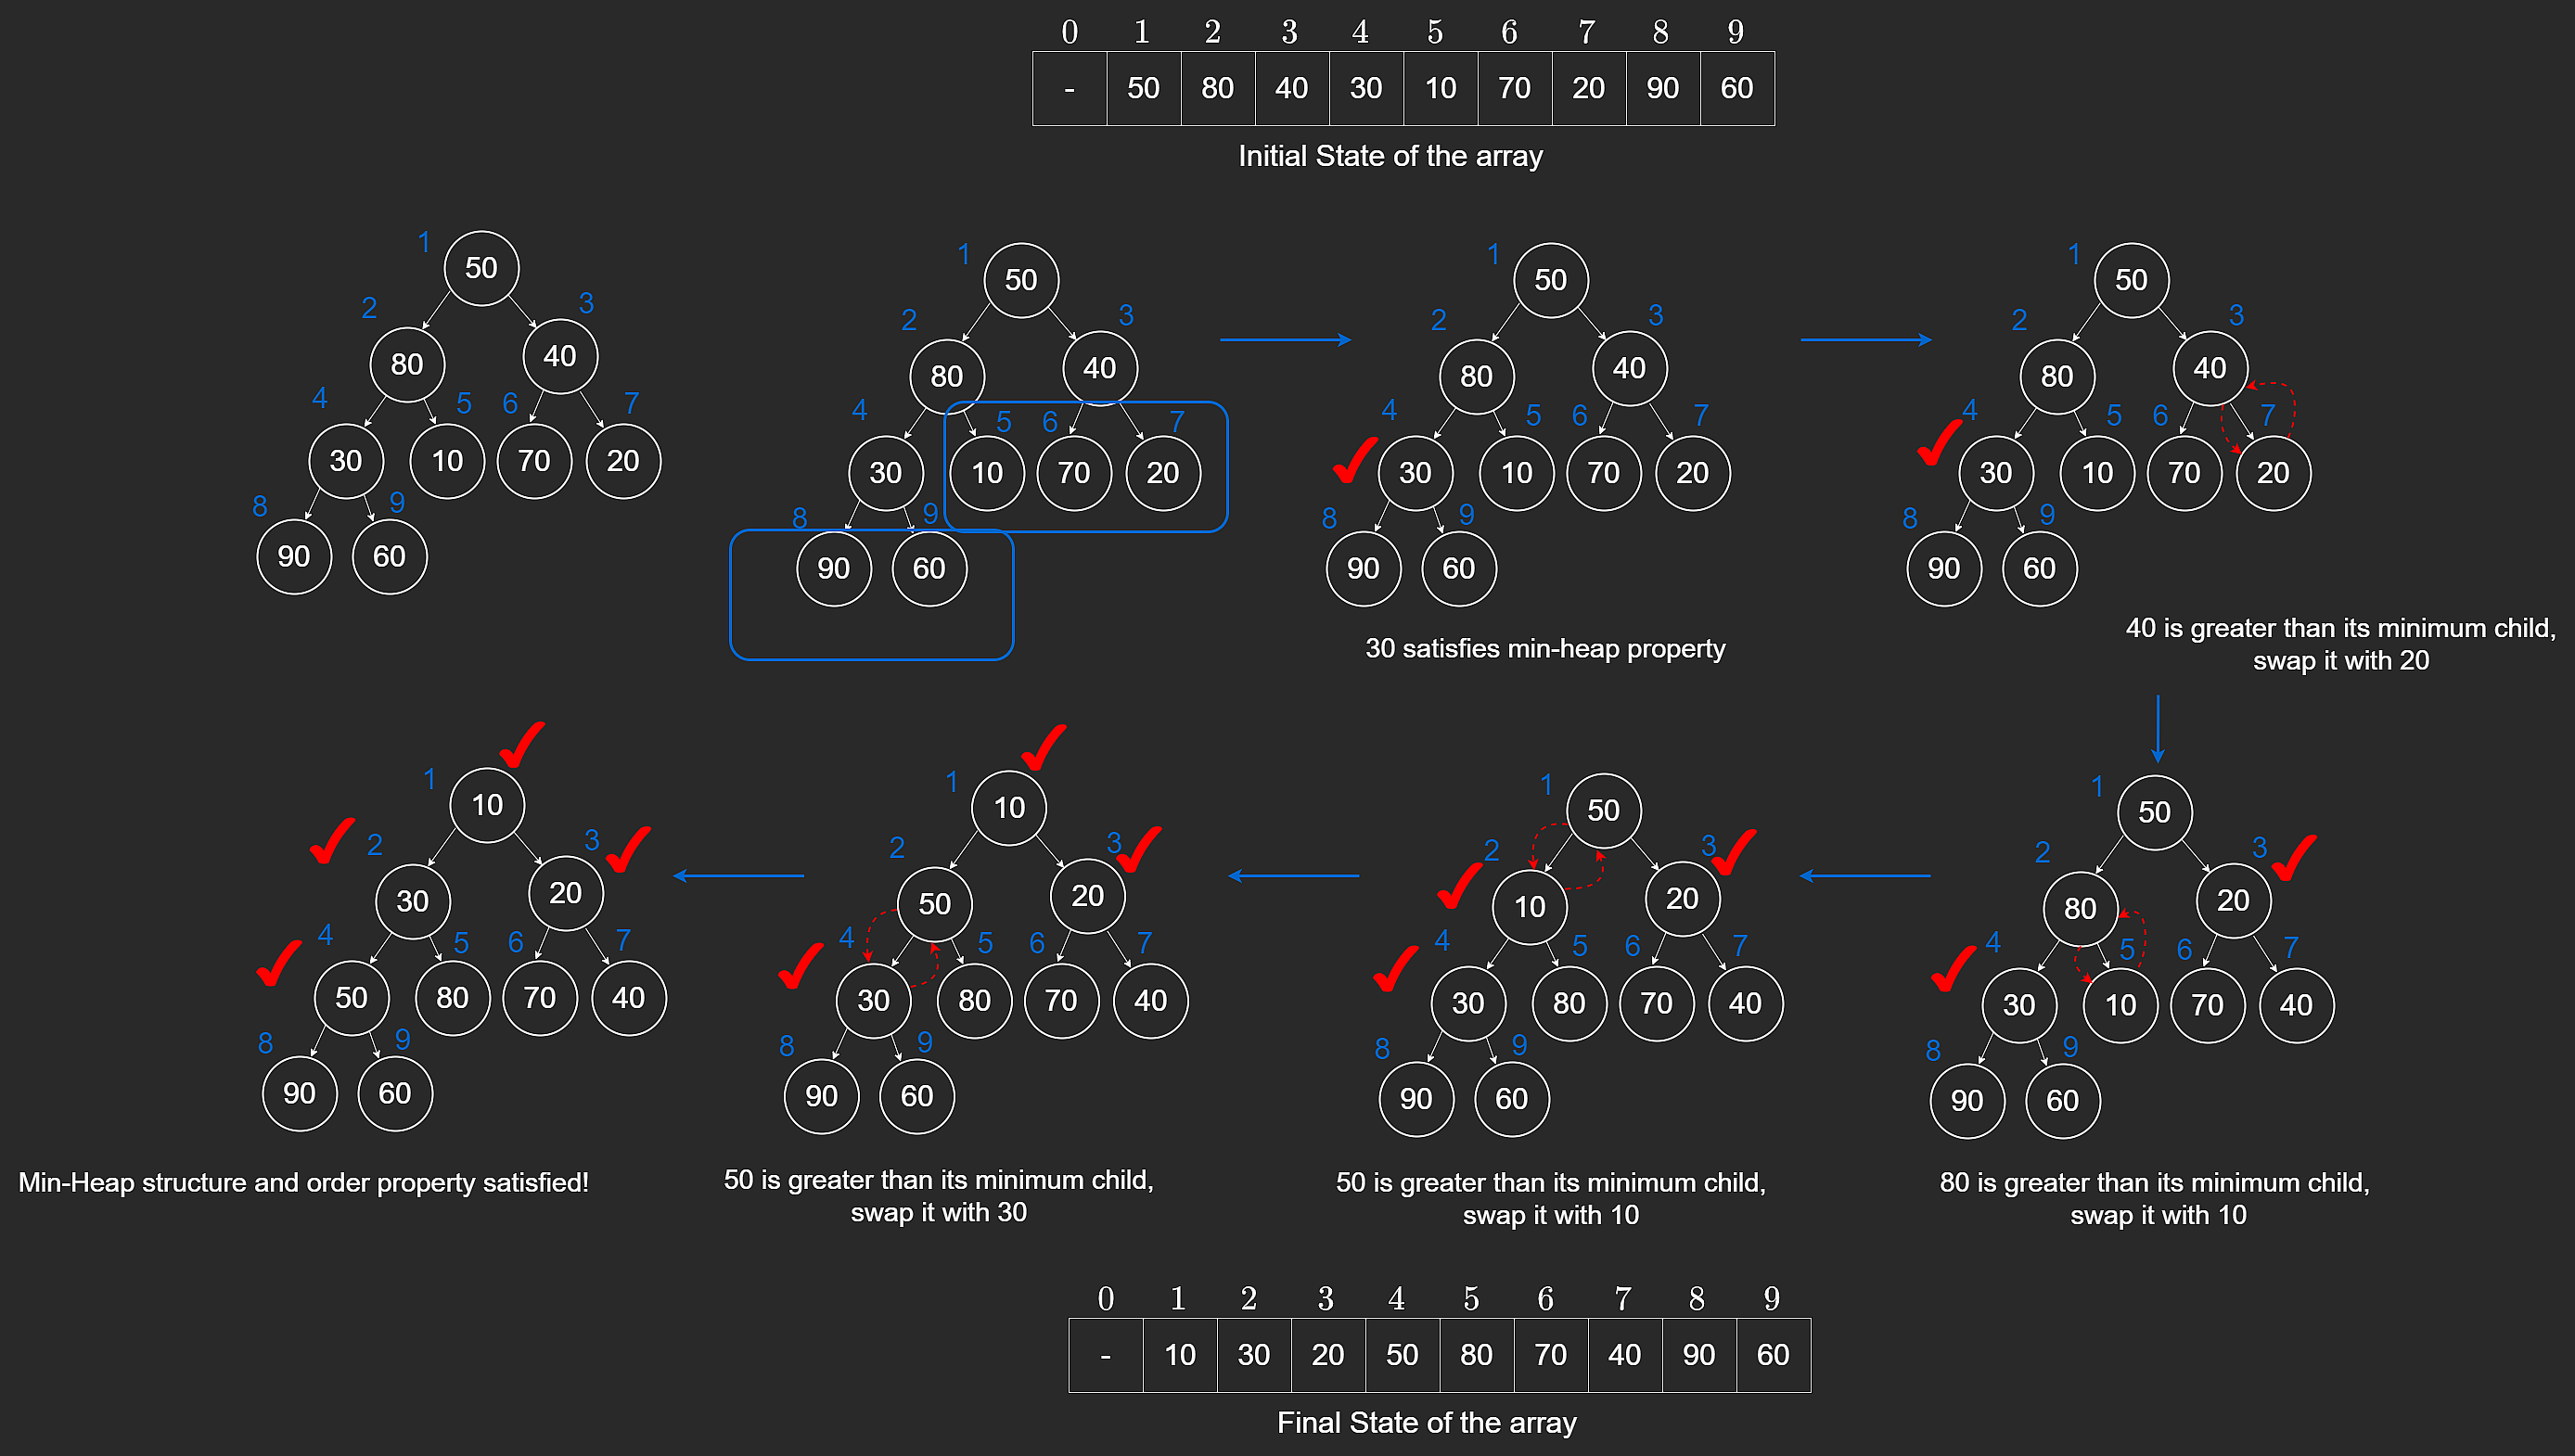

In [ ]:
def heapify(self, arr):
    # 0-th position is moved to the end, basically make the first elem a dummy elem
    arr.append(arr[0])

    
    self.heap = arr
    cur = (len(self.heap) - 1) // 2
    while cur > 0:
        # Percolate down
        i = cur
        while 2 * i < len(self.heap):
            if (2 * i + 1 < len(self.heap) and 
            self.heap[2 * i + 1] < self.heap[2 * i] and 
            self.heap[i] > self.heap[2 * i + 1]):
                # Swap right child
                tmp = self.heap[i]
                self.heap[i] = self.heap[2 * i + 1]
                self.heap[2 * i + 1] = tmp
                i = 2 * i + 1
            elif self.heap[i] > self.heap[2 * i]:
                # Swap left child
                tmp = self.heap[i]
                self.heap[i] = self.heap[2 * i]
                self.heap[2 * i] = tmp
                i = 2 * i
            else:
                break
        cur -= 1


## Complexity - $O(n)$

You might think since we go through (half) the array of $n$ elems, each time percolating through the entire tree of height $O(logn)$, that heapfiy should also be $O(nlogn)$. However, note that we ignore roughly $n/2$ leaf nodes in the tree (there are roughly $n/2$ leaf nodes and $n/2$ non leaf nodes in a binary tree). Then, as we go up, the number of nodes (in each layer) to percolate down decreases, but the number of layers it has to go through increases - this nice summation makes it $O(n)$!

Note that we can turn `array -> heap` in $O(n)$ but that doesnt mean we can sort it in $O(n)$. After we build the heap, to build a sorted array, we'll still have to sort in $O(nlogn)$ by popping elems one by one. This, called *heapsort*, is also $O(nlogn)$ which is comparable to MergeSort and BinaryTrees.

Downside of heaps is that we cannot search for values easily, this will take $O(n)$ since the value can exist in both left and right subtrees, whereas BSTs will be $O(logn)$

Note in practice for coding interviews, using heaps are way more common than BSTs as a utility data structure. Using BSTs is also common but you'll usually be implementing a portion of BST yourself